In [1]:
import os
import sys
import inspect
from matplotlib import pyplot as plt
import numpy as np
import pickle

currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir)

In [2]:


# file = open("../parsed_data.pkl", 'rb')
# corrs = pickle.load(file)
# file.close()

file = open("../parsed_data_nm2_gender.pkl", 'rb')
pcorrs = pickle.load(file)
file.close()

In [3]:
pcorrs[0].keys()

dict_keys(['adjacency', 'gender'])

In [4]:
matricies = [np.array(pc['adjacency']).flatten() for pc in pcorrs]

In [5]:
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA(n_components=100)
X_pca = pca.fit_transform(matricies)

# Explained variance ratio
explained_var_ratio = pca.explained_variance_ratio_
print(f"Explained Variance Ratio: {np.sum(explained_var_ratio)*100}%" )


Explained Variance Ratio: 22.44221776100752%


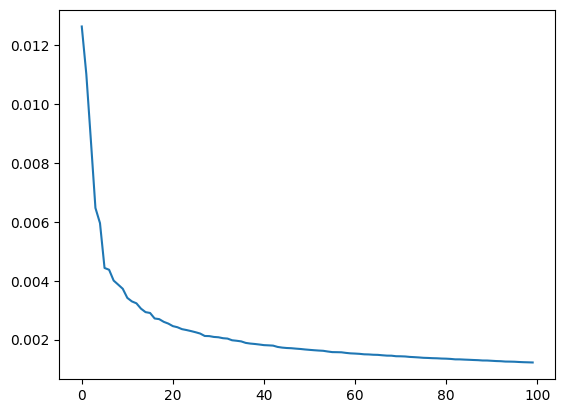

In [6]:
plt.plot(explained_var_ratio)

In [7]:
pca = PCA(n_components=10)
X_pca = pca.fit_transform(matricies)


Accuracy: 0.9104477611940298


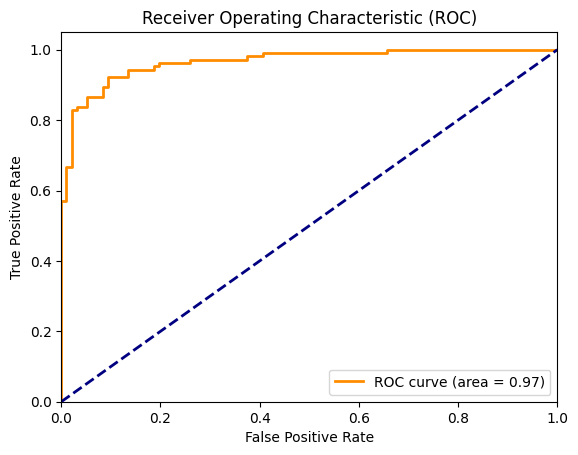

In [17]:
from sklearn.metrics import roc_curve, auc


# Define the XGBoost model
model = xgb.XGBClassifier(
    objective="binary:logistic",
    learning_rate=0.1,
    n_estimators=100,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# Fit the model on the training data
model.fit(X_train, y_train)


y_prob = model.predict_proba(X_test)[:, 1]
y_pred_binary = model.predict(X_test)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy:", accuracy)
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()